In [1]:
# update function
update = function(current_state){
    spinner = runif(1)
    if (current_state == "A"){
        if (spinner < 1 / 3) {
            next_state = "B"
        } else if (spinner < 2 / 3) {
            next_state = "C"
        } else if (spinner <1){
            next_state = "D"
        }
    }else if (current_state == "B"){
        if (spinner < 1 / 4) {
            next_state = "A"
        } else if (spinner < 2 / 4) {
            next_state = "C"
        } else if (spinner <3/4){
            next_state = "D"
        } else if (spinner <1){
            next_state = "E"
        }
    }else if (current_state == "C"){
        if (spinner < 1 / 2) {
            next_state = "A"
        } else if (spinner < 1) {
            next_state = "B"
        }
    }else if (current_state == "D"){
        if (spinner < 1 / 2) {
            next_state = "A"
        } else if (spinner < 1) {
            next_state = "B"
        }
    }else if (current_state == "E"){
        next_state = "B"
    } else{
        next_state = "Error"
    }

    return(next_state)
}

In [26]:
n = 10000
burn_in = 10000
saved_states = rep(NA, n)
initial_state = "C"
current_state = update(initial_state)
for (step in 2:burn_in){
    current_state = update(current_state)
}
for(step in 1:n){
    saved_states[step] = update(current_state)
    current_state = saved_states[step]
}


In [27]:
table(saved_states)/n

saved_states
     A      B      C      D      E 
0.2530 0.3311 0.1695 0.1665 0.0799 

# Classwork

random walk s= {1,2,3,4} p = 0.5
1. why is it a markov chain?

The probability of the next state only depends on the current state

2. code it for n = 1000, burn in = 1000

3. what burn in gives best? what n? n > 3000, burn in > 1000 - seems we need atleast 4,000 samples total

4. 0.25 for all


In [81]:
update = function(x) {
    p = runif(1)
    if (x == 1){
        if (p <0.5){
            next_state = 1
        } else if (p<1) {
            next_state = 2
        }
    } else if (x == 2){
        if (p <0.5){
            next_state = 1
        } else if (p<1) {
            next_state = 3
        }
    } else if (x == 3){
        if (p <0.5){
            next_state = 2
        } else if (p<1) {
            next_state = 4
        }
    } else if (x == 4){
        if (p <0.5){
            next_state = 3
        } else if (p<1) {
            next_state = 4
        }
    }
    return (next_state)
}

alternate_update = function(x) {
    i = sample(c(-1,1), 1)
    next_step = i + x
    if (next_step > 4){
        next_step = 4
    } else if (next_step<1){
        next_step = 1
    }
    return (next_step)
}

alternate_update_10 = function(x) {
    i = sample(c(-1,1), 1)
    next_step = i + x
    if (next_step > 10){
        next_step = 10
    } else if (next_step<1){
        next_step = 1
    }
    return (next_step)
}

In [112]:
n = 20000
burn_in = 5000
saved_states = rep(NA, n)
initial_state = 4
current_state = alternate_update_10(initial_state)
for (step in 2:burn_in){
    current_state = alternate_update_10(current_state)
}
for(step in 1:n){
    saved_states[step] = alternate_update_10(current_state)
    current_state = saved_states[step]
}

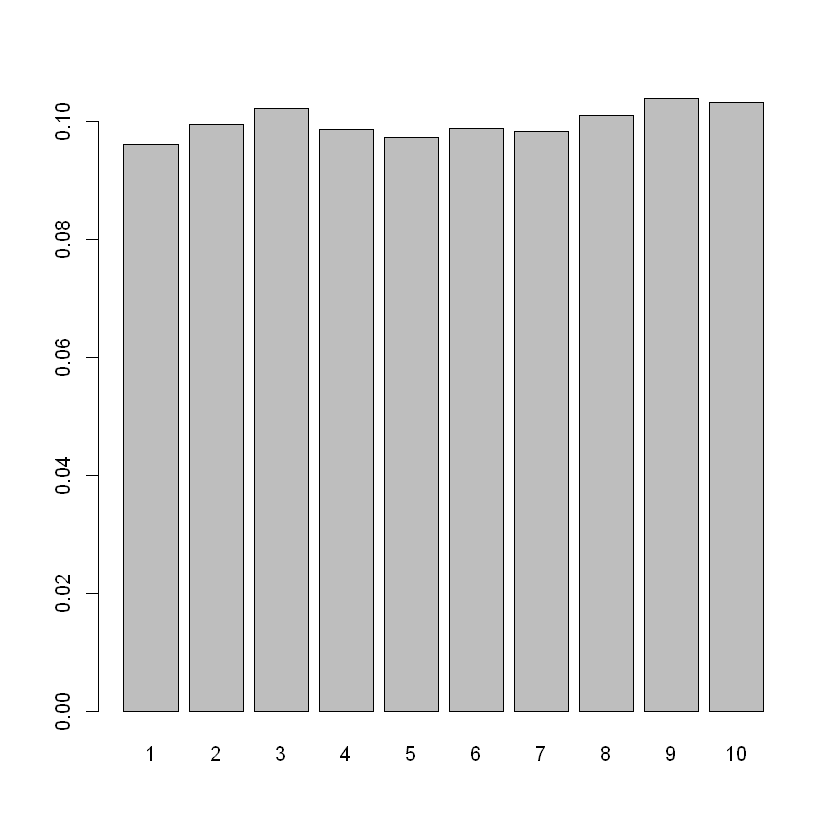

In [113]:
barplot(table(saved_states)/n)

# Class work 10/17